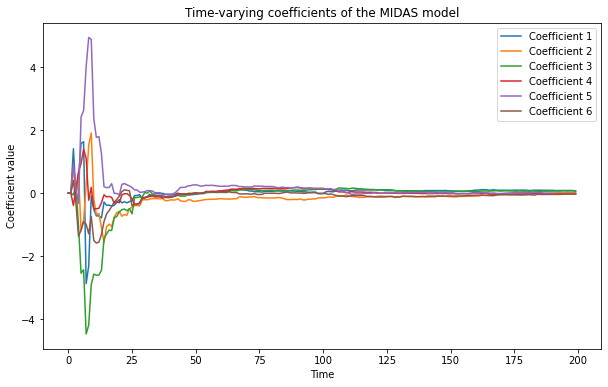

In [3]:
import numpy as np
import pandas as pd
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt

# Generate some toy data
np.random.seed(0)
n = 200
y = np.random.normal(size=n)
X = np.random.normal(size=(n, 3))

# Set up a MIDAS model with a lag of 2 periods
lags = 2
n_coef = X.shape[1] * lags
coef = np.random.normal(size=n_coef)

# Start with some initial values for the coefficients
coef_values = pd.DataFrame(np.zeros((n, n_coef)))

# Set up the dependent variable and regressors for the MIDAS model
y_midas = y[lags:]
X_midas = np.zeros((n-lags, n_coef))

for i in range(lags, n):
    X_midas[i-lags, :] = X[i-lags:i, :].flatten()

# Fit the time-varying MIDAS model
for i in range(lags, n):
    if i > lags:
        model = OLS(y_midas[:i-lags], X_midas[:i-lags, :])
        results = model.fit()
        coef_values.iloc[i, :] = results.params
    else:
        coef_values.iloc[i, :] = coef

# Plot the estimated coefficients over time
plt.figure(figsize=(10, 6))
for i in range(n_coef):
    plt.plot(coef_values.index, coef_values.iloc[:, i], label=f'Coefficient {i+1}')
plt.legend()
plt.title('Time-varying coefficients of the MIDAS model')
plt.xlabel('Time')
plt.ylabel('Coefficient value')
plt.show()
